# Neural Networks - Project

# Image Recognition using Neural Network

### 1. Data Import and Exploration [5 Marks]

#### 1A. Read the .h5 file and assign to a variable. [2 Marks]

In [2]:
#Reading the file & assigning it to a variable
f = h5py.File('/content/drive/MyDrive/Python - Collab/11. Module-8_Intro to Neural Networks & Deep Learning/Neural Networks - Project/Autonomous_Vehicles_SVHN_single_grey1.h5', 'r+')

#### 1B. Print all the keys from the .h5 file. [1 Marks]

In [3]:
#Printing all the key from the file
for key in f.keys():
  print(key)

X_test
X_train
X_val
y_test
y_train
y_val


#### 1C. Split the data into X_train, X_test, Y_train, Y_test [2 Marks]

In [4]:
#Since as per the keys the data set is already splitted into train, validation & test set, we combine train & validation set to be used as
#train set.

#Initially we read each dataset & convert them to an array
x_train = np.array(f['X_train'])
x_val = np.array(f['X_val'])
x_tes = np.array(f['X_test'])
y_train = np.array(f['y_train'])
y_val = np.array(f['y_val'])
y_tes = np.array(f['y_test'])

In [5]:
#Since we only need to split the dataset into train & test set, we do not need the validation set.
# Hence we combine the validation set with training set to increaset the training data.
x_tra = np.concatenate((x_train, x_val), axis=0)
y_tra = np.concatenate((y_train, y_val), axis=0)

- Now our data is available into 4 sets: x_tra, x_tes, y_tra & y_tes

### 2. Data Visualisation and preprocessing [13 Marks]

#### 2A. Print shape of all the 4 data split into x, y, train, test to verify if x & y is in sync. [1 Marks]

In [6]:
#Printing the shape of all the 4 data
print('Shape of X_train:', x_tra.shape)
print('Shape of X_test:', x_tes.shape)
print('Shape of Y_train:', y_tra.shape)
print('Shape of Y_test:', y_tes.shape)

Shape of X_train: (102000, 32, 32)
Shape of X_test: (18000, 32, 32)
Shape of Y_train: (102000,)
Shape of Y_test: (18000,)


In [7]:
#Distribution Ratio
unique_tra, frequency_tra = np.unique(y_tra, return_counts=True)
print('The distribution ratio for training set:', np.round((frequency_tra/len(y_tra)), 4))

unique_tes, frequency_tes = np.unique(y_tes, return_counts=True)
print('The distribution ratio for testing set:', np.round((frequency_tes/len(y_tes)), 4))

The distribution ratio for training set: [0.0999 0.0997 0.1    0.1008 0.0999 0.1003 0.0997 0.0999 0.0999 0.1   ]
The distribution ratio for testing set: [0.1008 0.1016 0.1002 0.0955 0.1007 0.0982 0.1018 0.1004 0.1007 0.1002]


- From the shape of datasets:
  - Training datasets (x_tra & y_tra) are in sync having 102000 data.
  - Testing datasets (x_tes & y_tes) are in sync having 18000 data.

- Further it can also be noted that the distrubution ratio of the data is maintained in both the training set & testing set. Hence the train & test set are also in sync.

#### 2B. Visualise first 10 images in train data and print its corresponding labels. [4 Marks]

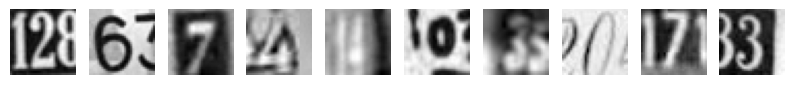

The corresponding labels of the images above are: [2 6 7 4 4 0 3 0 7 3]


In [8]:
#Visualizing the first 10 images of the train set & printing the corresponding labels.
plt.figure(figsize=(10,1))
for i in range(10):
  plt.subplot(1, 10, i+1)
  plt.imshow(x_tra[i], cmap='gray')
  plt.axis('off')
plt.show();
print('The corresponding labels of the images above are:', y_tra[:10])

#### 2C. Reshape all the images with appropriate shape update the data in same variable. [3 Marks]

In [9]:
#Reshaping the images 
x_tra = x_tra.reshape(x_tra.shape[0], 32*32) #Using the same variable to store reshaped images x_tra
x_tes = x_tes.reshape(x_tes.shape[0], 32*32) #Using the same variable to store reshaped images x_tes

#Printing the updated shape of images
print('Updated shape of images - X_train:', x_tra.shape)
print('Updated shape of images - X_test:', x_tes.shape)

Updated shape of images - X_train: (102000, 1024)
Updated shape of images - X_test: (18000, 1024)


#### 2D. Normalise the images i.e. Normalise the pixel values. [2 Marks]

In [10]:
#Normalizing the images (pixel values)
x_tra = x_tra/255.0
x_tes = x_tes/255.0

#### 2E. Transform Labels into format acceptable by Neural Network [2 Marks]

- Since our labels are already in form of integers, we need not transform them into any other format.
- The data used in digits directly using Saprse Categorical Cross-entropy is much faster then converting them into vector & using Categorical Cross-entropy since the model has to deal only with a single digit rather than a whole vector.
- Hence we use our labels as it is without performing any transformation.

#### 2F. Print total Number of classes in the Dataset. [1 Marks]

In [11]:
print('Classes', unique_tra)
print('Total No. of Classes:', len(unique_tra))

Classes [0 1 2 3 4 5 6 7 8 9]
Total No. of Classes: 10


- Hence there are total 10 classes in our dataset.

### 3. Model Training & Evaluation using Neural Network [12 Marks]

  #### 3A. Design a Neural Network to train a classifier. [3 Marks]

In [22]:
#Designing the Neural Network to train a classifier

#Creating the model
svnh1 = Sequential()
svnh1.add(InputLayer(input_shape=(x_tra.shape[1],)))
svnh1.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
svnh1.add(BatchNormalization())
svnh1.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
svnh1.add(BatchNormalization())
svnh1.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
svnh1.add(BatchNormalization())
svnh1.add(Dense(32, activation='relu', kernel_initializer='he_uniform'))
svnh1.add(BatchNormalization())
svnh1.add(Dropout(0.5))
svnh1.add(Dense(10, activation='softmax'))

#Compiling the model
svnh1.compile(loss=losses.sparse_categorical_crossentropy, optimizer=Adam(), metrics=['accuracy'])

In [23]:
svnh1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 256)               262400    
                                                                 
 batch_normalization_4 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 batch_normalization_5 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_6 (Batc  (None, 64)              

In [24]:
cp_svnh = ModelCheckpoint('model_weight_svnh.h5', monitor='val_accuracy', save_weights_only=True, mode='max', verbose=1)
redlr_svnh = ReduceLROnPlateau(monitor='val_accuracy', factor=0.1, patience=2, min_lr=1e-6, model='auto')
callbacks_svnh = [cp_svnh, redlr_svnh]

#### 3B. Train the classifier using previously designed Architecture (Use best suitable parameters). [3 Marks]

In [25]:
#Fitting the model
SVNH1 = svnh1.fit(x_tra, y_tra, epochs=100, verbose=2, batch_size=256, validation_data=(x_tes, y_tes), callbacks=callbacks_svnh)

Epoch 1/100

Epoch 1: saving model to model_weight_svnh.h5
399/399 - 7s - loss: 1.6861 - accuracy: 0.4507 - val_loss: 1.3764 - val_accuracy: 0.5457 - lr: 0.0010 - 7s/epoch - 17ms/step
Epoch 2/100

Epoch 2: saving model to model_weight_svnh.h5
399/399 - 2s - loss: 1.0406 - accuracy: 0.6812 - val_loss: 1.6438 - val_accuracy: 0.5217 - lr: 0.0010 - 2s/epoch - 6ms/step
Epoch 3/100

Epoch 3: saving model to model_weight_svnh.h5
399/399 - 3s - loss: 0.8629 - accuracy: 0.7394 - val_loss: 1.2024 - val_accuracy: 0.6126 - lr: 0.0010 - 3s/epoch - 7ms/step
Epoch 4/100

Epoch 4: saving model to model_weight_svnh.h5
399/399 - 3s - loss: 0.7629 - accuracy: 0.7730 - val_loss: 1.2518 - val_accuracy: 0.6019 - lr: 0.0010 - 3s/epoch - 8ms/step
Epoch 5/100

Epoch 5: saving model to model_weight_svnh.h5
399/399 - 3s - loss: 0.6862 - accuracy: 0.7976 - val_loss: 1.0608 - val_accuracy: 0.6639 - lr: 0.0010 - 3s/epoch - 6ms/step
Epoch 6/100

Epoch 6: saving model to model_weight_svnh.h5
399/399 - 3s - loss: 0.64

#### 3C. Evaluate performance of the model with appropriate metrics. [2 Marks]

In [26]:
#Evaluating the performance of the model
loss_svnh, accuracy_svnh = svnh1.evaluate(x_tes, y_tes, verbose=1)

563/563 [==============================] - 1s 3ms/step - loss: 0.3275 - accuracy: 0.9012


In [27]:
#Predicting the values of
y_pred_svnh = svnh1.predict(x_tes)
y_pred_svnh_fin = []
for i in y_pred_svnh:
  y_pred_svnh_fin.append(np.argmax(i))

563/563 [==============================] - 2s 3ms/step


In [28]:
#Generating the classification report of the model
print('The Classification Report of the above "SVNH" model \n', classification_report(y_tes, y_pred_svnh_fin))

The Classification Report of the above "SVNH" model 
               precision    recall  f1-score   support

           0       0.92      0.93      0.92      1814
           1       0.89      0.91      0.90      1828
           2       0.92      0.91      0.92      1803
           3       0.86      0.87      0.87      1719
           4       0.93      0.92      0.92      1812
           5       0.89      0.89      0.89      1768
           6       0.90      0.88      0.89      1832
           7       0.92      0.93      0.92      1808
           8       0.88      0.88      0.88      1812
           9       0.90      0.89      0.89      1804

    accuracy                           0.90     18000
   macro avg       0.90      0.90      0.90     18000
weighted avg       0.90      0.90      0.90     18000



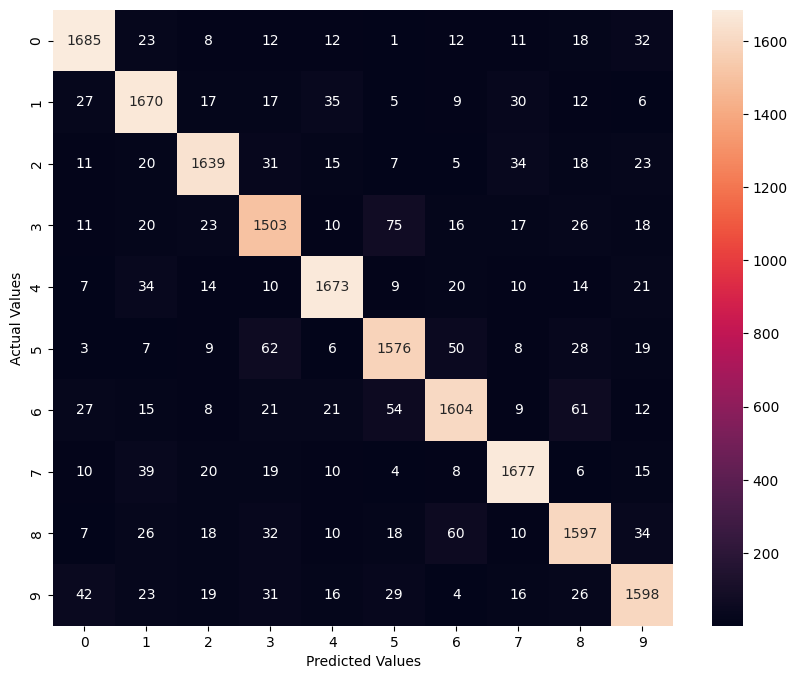

In [29]:
#Generating Confusion Matrix
cm_svnh = confusion_matrix(y_tes, y_pred_svnh_fin)

#Plotting Confusion Matrix usnig Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(cm_svnh, annot=True, fmt='d')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show();

#### 3D. Plot the training loss, validation loss vs number of epochs and training accuracy, validation accuracy vs number of epochs plot and write your observations on the same. [4 Marks]

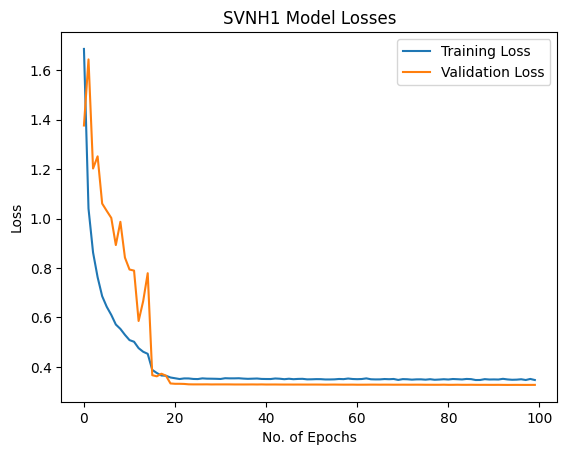

In [30]:
#Plotting Training Loss & Validation Loss vs Number of Epochs
plt.plot(SVNH1.history['loss'])
plt.plot(SVNH1.history['val_loss'])
plt.title('SVNH1 Model Losses')
plt.xlabel('No. of Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'], loc='best')
plt.show();

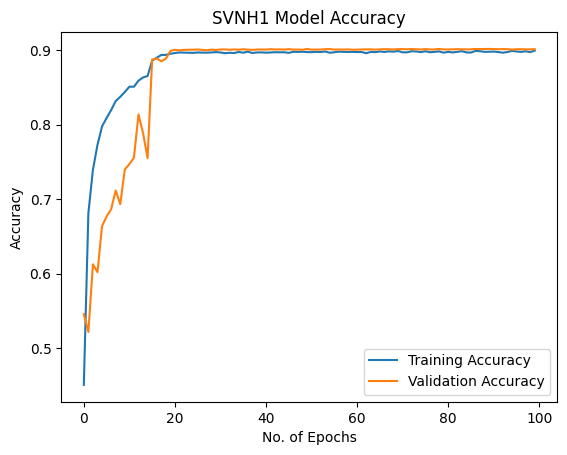

In [31]:
#Plotting Training Accuracy & Validation Accuracy vs Number of Epochs
plt.plot(SVNH1.history['accuracy'])
plt.plot(SVNH1.history['val_accuracy'])
plt.title('SVNH1 Model Accuracy')
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='best') 
plt.show();

#### Observations:
- The SVNH file dataset is comparatively a large dataset, hence a model can be trianed in a good manner.
- There are 10 classes in the dataset & all the classes seem to be in a balance. This can be considered a positive point for improvement of the model performance.
- Further the model works fine of training set but the performance has even improved on testing(validation) dataset.
- Also the point to be noted is that not only the accuracy of the model is high, but also the recall & precision of the modle seems to be on a higher side which suggest that the model can be said to be a better model.
- If the model is put to production, it will definately perform good & with time the performance shall improve.